In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! ls -l

total 56
-rw-r--r--  1 jarwind  staff     72 Dec  2 21:36 Logistic-Regression.ipynb
-rw-r--r--  1 jarwind  staff  23873 Dec  2 21:36 diabetes.csv


In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [8]:
pima = pd.read_csv('diabetes.csv')

In [10]:
pima.columns= col_names

In [11]:
pima.head(3)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [12]:
# predictors - target specification

features = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

In [13]:
X = pima[features] # predictors

In [14]:
Y = pima['label'] # target

In [15]:
# performing train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.75, random_state = 16)

In [16]:
# developing logistic regression model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 16)

# fitting the model on our data

logreg.fit(X_train, Y_train)

# performing prediction on test set using predict()

Y_pred = logreg.predict(X_test)

/Users/jarwind/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn import metrics

In [20]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

In [21]:
cnf_matrix

array([[329,  41],
       [ 96, 110]])

In [22]:
from sklearn.metrics import classification_report

In [23]:
target_names = ['without_diabetes', 'with_diabetes']

In [24]:
print(classification_report(Y_test, Y_pred, target_names = target_names))

                  precision    recall  f1-score   support

without_diabetes       0.77      0.89      0.83       370
   with_diabetes       0.73      0.53      0.62       206

        accuracy                           0.76       576
       macro avg       0.75      0.71      0.72       576
    weighted avg       0.76      0.76      0.75       576



In [25]:
# drawing the ROC curve

y_pred_probabilities = logreg.predict_proba(X_test)[::,1]

In [26]:
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_probabilities)

In [27]:
auc = metrics.roc_auc_score(Y_test, y_pred_probabilities)

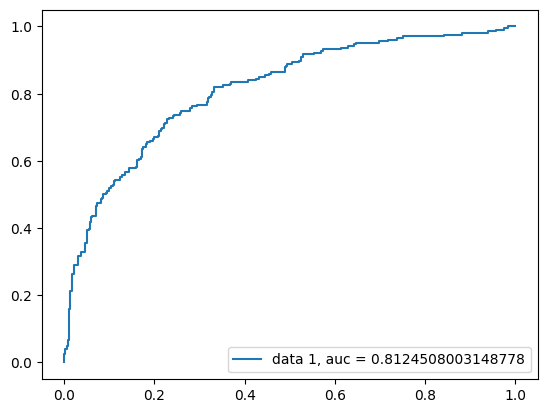

In [29]:
plt.plot(fpr, tpr, label = f"data 1, auc = {auc}")
plt.legend(loc = 4)
plt.show()